<a href="https://colab.research.google.com/github/LinashaUdeshini/assignment/blob/main/AS2019371_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1**. Import Libraries** 

In [ ]:
#import libraries
import pandas as pd                                          #use for data manipulation and analysis 
import numpy as np                                           #use for mathematical operations, multi-dimensional arrays and matrices
import matplotlib.pyplot as plt                              #use for visualization 2D and 3D plots
from matplotlib.colors import ListedColormap                 
import seaborn as sns                                        #use for plotting statistical graphics


# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam



# **2. Set operations**

In [ ]:
#set options
pd.options.display.max_columns = None                         # display all columns of the dataframe
pd.options.display.max_rows = 50                              # display all rows of the dataframe
np.set_printoptions(suppress=True)                            # use below code to convert the 'exponential' values to float

# **3. Read Data**

In [ ]:
#read csv file using pandas
df_mobile = pd.read_csv("/Mobile_Dataset.csv")
df_mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


# **4. Data analysis and preparion**

**4.1 Understand data types**

---



In [ ]:
#extract the variables with its data type
df_mobile.dtypes


battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

**Interpretaion** - Here all the variables except clock_speed and m_dep is int64. clock_speed and m_dep are in float64 format. All the varials are in numeric format. So dont want any linear transformations. Basically we use linear transformations for resizing inputs to a fixed size or change non-numeric data into numeric data. Here all the data are in numeric type and the size of data are ok. So dont wan any linear transformations. 

**4.2. Summary Statistic**

In [ ]:
#summary statistic for the dataset
df_mobile.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**Interpretation -** Here I have represent the summary statistic for all the variables. Here count defines the number of data in each variable. In here there are some values which are 0 but it cannot be 0 exacly. Before the analysis of data we have to remove those 0 values with the mean value of that column.

**4.3 Handling impossible values**

In [ ]:
#convert the zero values in battery_power,clock_speed,fc,sc_w,talk_time,int_memory,px_height,m_dep,mobile_wt,n_cores,pc,px_width,ram,sc_h,sc_w,talk_time into NAN
sum(df_mobile.isnull().sum())
df_mobile[['battery_power','clock_speed','fc','sc_w','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h']]=df_mobile[['battery_power','clock_speed','fc','sc_w','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h']].replace(0,np.NAN)

#convert the NAN values in battery_power,clock_speed,fc,sc_w,talk_time,int_memory,px_height,m_dep,mobile_wt,n_cores,pc,px_width,ram,sc_h,sc_w,talk_time into mean value of each column
df_mobile.fillna(df_mobile.mean(),inplace=True)
df_mobile

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0000,0,7,0.6,188,2,2.0,20.0,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,5.6481,1,53,0.7,136,3,6.0,905.0,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0000,1,41,0.9,145,5,6.0,1263.0,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,5.6481,0,10,0.8,131,6,9.0,1216.0,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0000,1,44,0.6,141,2,14.0,1208.0,1212,1411,8,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,5.6481,1,2,0.8,106,6,14.0,1222.0,1890,668,13,4.0,19,1,1,0,0
1996,1965,1,2.6,1,5.6481,0,39,0.2,187,4,3.0,915.0,1965,2032,11,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0000,1,36,0.7,108,8,3.0,868.0,1632,3057,9,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0000,1,46,0.1,145,5,5.0,336.0,670,869,18,10.0,19,1,1,1,0


Before the analysis I have removed the all impossible values with the mean value of that relevant variable. Missing values handling creates a proper dataset and the conclusions become more reliable.

**4.4 Handling missing values**

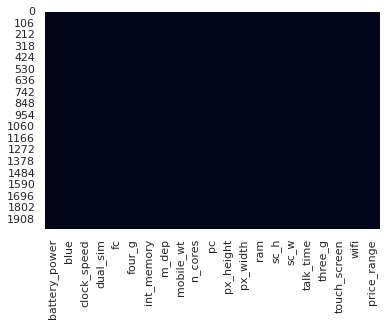

In [ ]:
#check for missing values
Total = df_mobile.isnull().sum().sort_values(ascending = False)  
Percent = (df_mobile.isnull().sum()*100/df_mobile.isnull().count()).sort_values(ascending = False) 
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data
sns.heatmap(df_mobile.isnull(), cbar=False)

# display the plot
plt.show()

There is no any missing values. So now our dataset is a proper one for futher calculations. 

**4.5.Distribution of variables**

***4.5.1.Split variables***






In [ ]:
#split other variables with target variable mobile price (price_range)
df_features = df_mobile.iloc[:, df_mobile.columns != 'price_range']   #split independent variables
df_numerical=df_features.loc[:, ~df_features.columns.isin(['blue','dual_sim','four_g','dual_sim','three_g','touch_screen','wifi'])] #split numerical variables
df_target = df_mobile.iloc[:, df_mobile.columns == 'price_range']


Here I want to campare target variable with other variables. Main purpose this is to  clarify what are the other variables which highly affact to target output.

***4.5.1.Distribution of numerical independent variables***

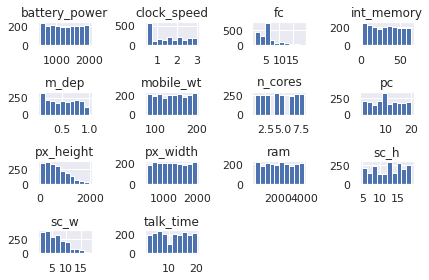

In [ ]:
#find out the distribution of the variables
df_numerical.hist()      #by default this will only consider the numerical independent variables
plt.rcParams['figure.figsize'] = [10,10]
plt.tight_layout()
plt.show() 

**Interpretation** - Most of the distributions of variables are random but the distribution of the variables named fc, px_height, sc_w are positively skewned. 

***4.5.1.Distribution of dependent variables***

In [ ]:
#frequency of dependent variable 

dependent_frequency = df_target.price_range.value_counts()    # get counts of 0's, 1's, 2's and 3's in the 'price_range' variable using 'value_counts()'
dependent_frequency                                  

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

**Interpretation** - There are same number of data for the each range of price range. 

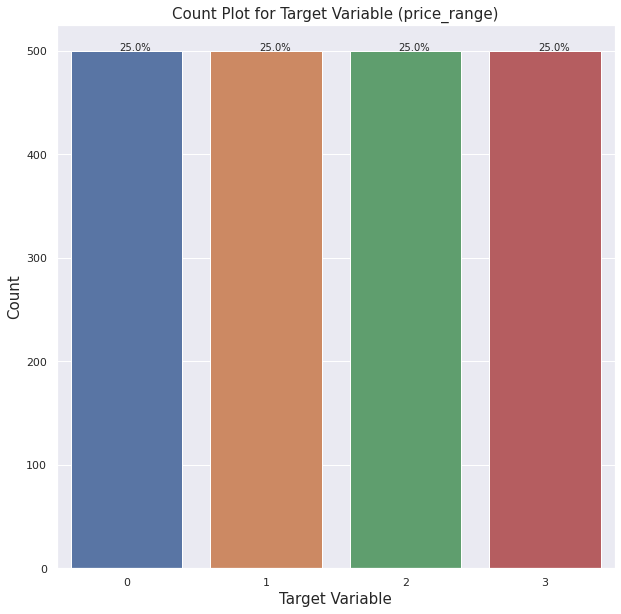

In [ ]:
#distribution of dependent variable according to the range
sns.countplot(x = df_target.price_range)

# print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text on the plot
plt.text(x = -0.05, y = df_target.price_range.value_counts()[0], s = str((dependent_frequency[0])*100/len(df_target.price_range)) + '%')
plt.text(x = 0.95, y = df_target.price_range.value_counts()[1], s = str((dependent_frequency[1])*100/len(df_target.price_range)) + '%')
plt.text(x = 1.95, y = df_target.price_range.value_counts()[2], s = str((dependent_frequency[2])*100/len(df_target.price_range)) + '%')
plt.text(x = 2.95, y = df_target.price_range.value_counts()[3], s = str((dependent_frequency[3])*100/len(df_target.price_range)) + '%')

# add plot and axes labels
plt.title('Count Plot for Target Variable (price_range)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

**Interpretation** - There are same number of data for the each range of price range. 

**4.6. Correlation**

In [ ]:
#find the correlation of price range with other features
corrmat = df_mobile.corr()
corrmat

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.029019,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.037947,0.015338,-0.008402,-0.000653,-0.029959,-0.021325,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.012704,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.005156,-0.006865,-0.041533,0.026351,-0.002952,-0.025094,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,0.006041,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.011531,-0.013596,-0.009476,0.003443,-0.029078,-0.003510,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.020124,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.026806,-0.022382,0.014291,0.041072,-0.011949,-0.003460,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.029019,0.012704,0.006041,-0.020124,1.000000,0.003276,-0.032007,-0.027696,0.009174,-0.003644,0.490812,0.003630,0.002183,0.000828,-0.015130,-0.024740,-0.001079,0.022405,-0.002838,0.014242,0.011738
four_g,0.015665,0.013443,-0.043073,0.003187,0.003276,1.000000,0.008690,-0.001823,-0.016537,-0.029706,0.005737,-0.017861,0.007448,0.007313,0.027166,0.031298,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.032007,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.039603,0.009565,-0.008335,0.032813,0.037771,0.005431,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.027696,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.020068,0.024523,0.023566,-0.009434,-0.025348,-0.010831,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.009174,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.011592,0.000374,0.000090,-0.002581,-0.033855,-0.036691,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.003644,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,0.000513,-0.005937,0.024480,0.004868,-0.000315,0.020468,0.013148,-0.014733,0.023774,-0.009964,0.004399


**Interpretation** - All the variables except the ram have approximately value of 0 correlation with price_range which means those variables don't have any relationship with price ange. But ram has a approximately value of 1 for correlation value with price range which means ram and price range has a positive relationship. Means that price vary with ram positively. So ram capacity aaffect to the mobile price range positively. 

**4.7. Discover and remove outliers**

***4.7.1 Discover outliers***

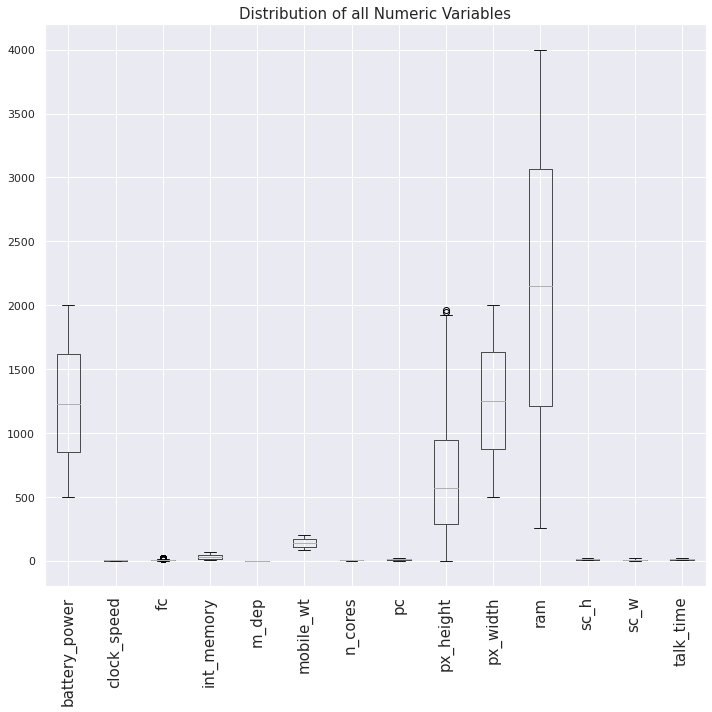

In [ ]:
#discover outliers
# plot a boxplot to visualize the outliers in all the numeric variables
df_numerical.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.rcParams['figure.figsize'] = [15,8]
plt.tight_layout()
plt.show()


**Interpretation** - Here fc and the px_height variables have the outliers. So, below I have seperately lot them.

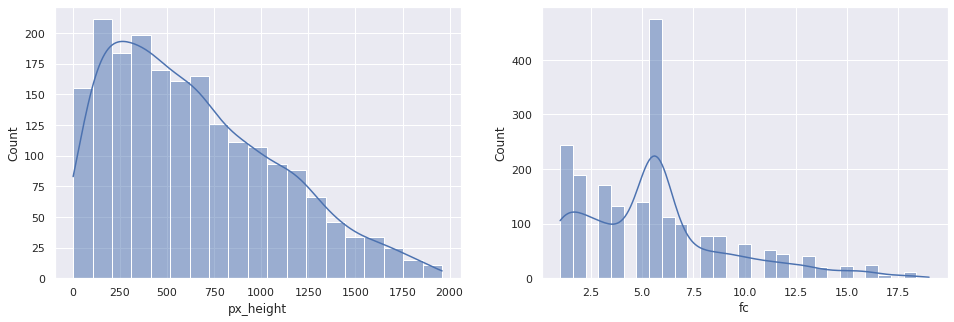

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df_mobile['px_height'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df_mobile['fc'], kde=True)

plt.show()

**Interpretation** - only fc and the px_height are the variables only have outliers. So we have remove those outliers and get dataset into some scale which means normalization. Here I have used IQR method. 




***4.7.2. Remove Outliers***

In [ ]:
df_mobile['fc'].skew()

1.0160938749776578

In [ ]:
upper1 = df_mobile.fc.mean() + 3*df_mobile.fc.std()

lower1 = df_mobile.fc.mean() -3*df_mobile.fc.std()

upper2 = df_mobile.px_height.mean() + 3*df_mobile.px_height.std()

lower2 = df_mobile.px_height.mean() -3*df_mobile.px_height.std()

print("upper limit of Front Camera mega pixels = " )
print(upper1)
print("lower limit Front Camera mega pixels =")
print(lower1)
print("upper limit of pixel resolution height = " )
print(upper2)
print("lower limit of pixel resolution height = " )
print(lower2)

new_df= df_mobile[(df_mobile.fc<upper1) & (df_mobile.fc>lower1) & (df_mobile.px_height<upper2) & (df_mobile.px_height>lower2)]

df_mobile = new_df

print("normalized data set shape  = " )
df_mobile.shape

upper limit of Front Camera mega pixels = 
16.496554666797856
lower limit Front Camera mega pixels =
-5.200355453167448
upper limit of pixel resolution height = 
1975.6866725865452
lower limit of pixel resolution height = 
-684.1791650790378
normalized data set shape  = 


(1982, 21)

# **5. Data Preparation**

**5.1 Seperate target values from independent variables**

In [ ]:
#seperate the target value from independent variables
y=df_mobile.price_range
df_mobile = df_mobile.drop('price_range', axis = 1)

**5.2 Scale the values**

In [ ]:
#scale the numeric variables
df_num = df_mobile.apply(lambda rec: (rec - rec.mean()) / rec.std())

df_num.head()
X = df_num.copy() #rename the variables
X.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.897860,-0.989710,0.831324,-1.018075,-1.318076,-1.043056,-1.383263,0.338610,1.352780,-1.103874,-1.499759,-1.412304,-1.144377,0.390773,-0.788968,0.162513,1.464478,-1.783208,-1.002779,0.988712
1,-0.490453,1.009887,-1.249085,0.981751,0.031846,0.958238,1.154872,0.685087,-0.116872,-0.667346,-0.782401,0.593421,1.707411,0.466402,1.111075,-0.846988,-0.734458,0.560504,0.996726,-1.010907
2,-1.532867,1.009887,-1.249085,0.981751,-1.027652,0.958238,0.492750,1.378041,0.137491,0.205710,-0.782401,1.404777,1.077796,0.440578,-0.313958,-1.099363,-0.367969,0.560504,0.996726,-1.010907
3,-1.414515,1.009887,1.198455,-1.018075,0.031846,-1.043056,-1.217733,1.031564,-0.258184,0.642238,-0.244383,1.298258,1.239829,0.593681,0.873569,0.414888,-0.001479,0.560504,-1.002779,-1.010907
4,1.330357,1.009887,-0.392446,-1.018075,2.167019,0.958238,0.658281,0.338610,0.024441,-1.103874,0.652315,1.280127,-0.088845,-0.658814,-1.026474,-1.099363,0.731500,0.560504,0.996726,-1.010907


**Interpretation** - Here scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

# **6. Apply KNN Algorithm**

**6.1. Split Train and Test data**

In [ ]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)  
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (1585, 20)
y_train (1585,)
X_test (397, 20)
y_test (397,)


**6.2 Apply KNN Model**

In [ ]:
#build KNN model

knn_classification = KNeighborsClassifier(n_neighbors = 5)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

# **7. Prediction and Evaluation for KNN**

**7.1 Prediction**

In [ ]:
y_pred = knn_model.predict(X_test)
print(y_pred)

[3 2 0 0 0 1 1 1 3 0 1 1 0 2 2 0 1 1 2 2 3 0 1 3 1 2 2 0 3 0 2 0 1 2 0 1 2
 0 0 3 3 2 0 2 1 1 3 0 2 3 2 0 3 2 2 1 1 0 0 3 2 3 3 2 2 2 0 1 0 0 2 1 2 0
 3 1 1 0 3 0 0 1 1 1 0 3 1 0 2 2 2 0 0 2 0 2 2 0 3 1 3 1 3 3 3 2 2 1 0 2 2
 3 1 2 1 2 2 0 3 0 2 3 3 0 2 2 1 1 0 0 3 3 3 0 1 0 2 2 0 1 3 1 1 3 1 2 2 1
 0 3 1 0 1 0 0 1 1 0 1 1 1 1 2 2 3 3 3 1 2 2 2 1 3 0 3 0 1 0 1 0 1 1 2 3 2
 0 3 1 1 2 2 1 2 1 0 1 3 2 2 3 0 0 1 3 2 0 2 3 3 2 0 2 1 1 0 1 1 0 1 3 2 1
 0 3 0 1 2 1 0 3 0 1 0 0 0 1 0 3 0 0 0 3 3 0 3 3 1 2 1 2 0 2 2 1 0 2 2 0 0
 0 3 2 2 3 3 1 1 2 1 1 0 0 1 2 2 1 3 1 0 3 0 2 1 2 3 2 1 0 0 2 0 1 0 2 1 0
 3 0 1 0 0 0 0 0 1 0 0 0 1 0 2 0 0 1 0 0 2 2 0 0 1 2 2 0 0 0 2 1 2 0 0 1 2
 3 0 2 0 2 3 1 2 1 1 0 0 0 3 0 0 0 0 1 1 2 0 3 1 2 1 1 0 3 1 2 0 0 3 0 3 1
 3 1 1 1 1 1 1 0 2 3 2 1 0 1 0 3 3 0 2 0 0 3 3 3 0 0 3]


In [ ]:

mae = mean_absolute_error(y_test,y_pred)
print("MAE : %.3f " % mae)

MAE : 0.559 


**7.2. Evaluation**

***7.2.1 Accuracy***

In [ ]:
acc = knn_model.score(X_test, y_test)
print('Test Accuracy:', knn_model.score(X_test, y_test))
print('Training Accuracy:', knn_model.score(X_train, y_train))

Test Accuracy: 0.5390428211586902
Training Accuracy: 0.7009463722397477


**Interpretation** - we can conclude that when K is small i.e. K=5, Training Accuracy is High but Test Accuracy is Low which means the model is over-fitting ( High Variance or High Model Complexity). When the value of K is large i.e. K=50, Training Accuracy is Low as well as Test Accuracy is Low which means the model is under-fitting ( High Bias or Low Model Complexity ).

So Hyperparameter tuning is necessary i.e. to select the best value of K in KNN algorithm for which the model has Low Bias and Low Variance and results in a good model with high out of sample accuracy.

***7.2.2. Confusion matrix***

In [ ]:
confusion_mat = confusion_matrix(y_test,y_pred,labels=[0,1,2,3])  # 0 - neagative label / 1 - positive label
print("Confusion Matrix : ")
print(confusion_mat)

Confusion Matrix : 
[[79 18  2  1]
 [34 43 21  3]
 [ 8 30 43 20]
 [ 5 14 27 49]]


***7.2.3.Normalized confusion matrix***

In [ ]:
print("Normalized Confusion MAtrix : ")
print(np.round(confusion_mat/np.sum(confusion_mat,axis=1).reshape(-1,1),2))

Normalized Confusion MAtrix : 
[[0.79 0.18 0.02 0.01]
 [0.34 0.43 0.21 0.03]
 [0.08 0.3  0.43 0.2 ]
 [0.05 0.15 0.28 0.52]]


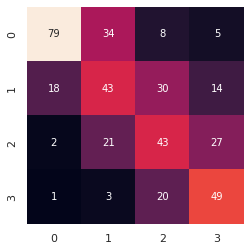

In [ ]:

sns.set()
get_ipython().run_line_magic('matplotlib','inline')
sns.heatmap(confusion_mat.T,square=True,annot=True,fmt='d',cbar=False)

***7.2.4. Classification Report***

In [ ]:
print("Classification Report : ",metrics.classification_report(y_pred,y_test,target_names=["0","1","2","3"]))

Classification Report :                precision    recall  f1-score   support

           0       0.79      0.63      0.70       126
           1       0.43      0.41      0.42       105
           2       0.43      0.46      0.44        93
           3       0.52      0.67      0.58        73

    accuracy                           0.54       397
   macro avg       0.54      0.54      0.54       397
weighted avg       0.56      0.54      0.54       397



# **8. Apply MLNN model**

**8.1. Split the dataset**

Here I have use the above cleaned data use for KNN model

In [ ]:
dataset = df_mobile.values
dataset

array([[ 842. ,    0. ,    2.2, ...,    0. ,    0. ,    1. ],
       [1021. ,    1. ,    0.5, ...,    1. ,    1. ,    0. ],
       [ 563. ,    1. ,    0.5, ...,    1. ,    1. ,    0. ],
       ...,
       [1911. ,    0. ,    0.9, ...,    1. ,    1. ,    0. ],
       [1512. ,    0. ,    0.9, ...,    1. ,    1. ,    1. ],
       [ 510. ,    1. ,    2. , ...,    1. ,    1. ,    1. ]])

In [ ]:
#split the independent variables as x and dependent variable as y
X_ml = dataset[:,0:20]
X_ml
Y_ml = y
Y_ml

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 1982, dtype: int64

In [ ]:
#split the training data set
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_ml, Y_ml, test_size=0.2 , random_state=42)
X_val_and_test.shape

(397, 20)

In [ ]:
#split the testing data set
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1585, 20) (198, 20) (199, 20) (1585,) (198,) (199,)


**8.2. Apply the MLNN model**



In [ ]:
model = Sequential([
 Dense(16, activation="relu", input_shape=(20,)),
 Dense(16,activation='relu'),
 Dense(4,activation='softmax')
])
model.compile(
   loss = SparseCategoricalCrossentropy(),
   optimizer = Adam(),
   metrics="accuracy")

In [ ]:
model.fit(X_train,Y_train,validation_data=(X_val, Y_val),epochs=100)

Epoch 1/100
50/50 [==============================] - 1s 4ms/step - loss: 228.8061 - accuracy: 0.3079 - val_loss: 117.4883 - val_accuracy: 0.2626
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 60.0261 - accuracy: 0.3350 - val_loss: 23.6343 - val_accuracy: 0.3384
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 12.3560 - accuracy: 0.4700 - val_loss: 9.9270 - val_accuracy: 0.5000
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 7.4266 - accuracy: 0.5256 - val_loss: 7.6685 - val_accuracy: 0.5303
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 5.5594 - accuracy: 0.5401 - val_loss: 5.8647 - val_accuracy: 0.4848
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 4.1760 - accuracy: 0.5420 - val_loss: 3.8868 - val_accuracy: 0.5758
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 3.2476 - accuracy: 0.5558 - val_loss: 2.4614 - val_accuracy: 0.6212
Epoch 

# **9. Prediction and Evaluation for MLNN model** 

**9.1. Model Evaluation**

In [ ]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 1ms/step - loss: 1.2118 - accuracy: 0.6131


[1.2118018865585327, 0.6130653023719788]

**9.2. Prediction**

In [ ]:
def predictionrelease(preds):
    arr = []
    for i in range(0,len(preds)):
        ans=np.argmax(preds[i])
        arr.append(ans)
    len(arr)
    return arr

In [ ]:
 #testing our cross val sets
preds_test = model.predict(X_test)      
test_preds = predictionrelease(preds_test)

7/7 [==============================] - 0s 1ms/step


**9.3. Classification Report**

In [ ]:
acc1 = accuracy_score(Y_test,test_preds)
acc1
#cross validation
print(classification_report(Y_test,test_preds)) 

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        59
           1       0.44      0.26      0.33        31
           2       0.89      0.14      0.24        59
           3       0.51      1.00      0.68        50

    accuracy                           0.61       199
   macro avg       0.65      0.59      0.52       199
weighted avg       0.69      0.61      0.54       199



# **10. Compare KNN model with MLNN model**

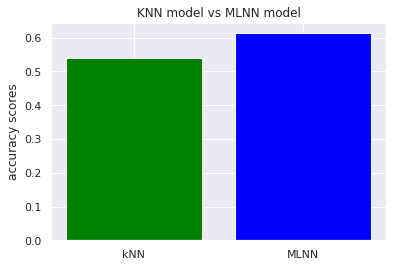

In [ ]:
models = ['kNN','MLNN']
acc_scores = [acc, acc1]

plt.bar(models, acc_scores, color=['green', 'blue'])
plt.ylabel("accuracy scores")
plt.title("KNN model vs MLNN model")
plt.show()